In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

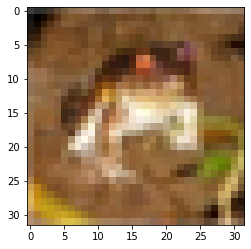

In [6]:
plt.imshow(X_train[0])

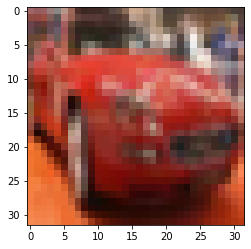

In [7]:
plt.imshow(X_train[5])

In [8]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
y_train_en = to_categorical(y_train,10)

In [11]:
y_test_en = to_categorical(y_test,10)

In [12]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
history = model.fit(X_train, y_train_en, epochs=20,verbose=1,validation_data=(X_test,y_test_en))

Epoch 1/20
1563/1563 [==============================] - 68s 42ms/step - loss: 1.5494 - accuracy: 0.4334 - val_loss: 1.3340 - val_accuracy: 0.5210
Epoch 2/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.2307 - accuracy: 0.5641 - val_loss: 1.1886 - val_accuracy: 0.5797
Epoch 3/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1117 - accuracy: 0.6102 - val_loss: 1.0970 - val_accuracy: 0.6192
Epoch 4/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0218 - accuracy: 0.6413 - val_loss: 1.0318 - val_accuracy: 0.6402
Epoch 5/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9495 - accuracy: 0.6664 - val_loss: 1.0782 - val_accuracy: 0.6242
Epoch 6/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8941 - accuracy: 0.6865 - val_loss: 1.0041 - val_accuracy: 0.6496
Epoch 7/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8464 - accuracy: 0.7040 - val_loss: 0.9840 -